In [1]:
import sqlite3


conn = sqlite3.connect('nine.sqlite3')
conn.row_factory=sqlite3.Row
c = conn.cursor()
c.execute("SELECT * FROM Iris WHERE Species='Iris-setosa'")
for each in c.fetchmany(5): #Iris-setosaს პირველ 5 ხაზს დაბეჭდავს
    print(tuple(each))


(2, 4.9, 3, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')


In [2]:
print(c.fetchone()['SepalLengthCm'])#აბრუნებს პირველ ჩანაწერს მოცემული ველიდან
print(tuple(c.fetchone()))#დააბრუნებს მეორე ხაზს ცხრილიდან


4.6
(8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa')


In [3]:
for each in c.fetchall():#Iris-setosaს ყველა მონაცემს დაბეჭდავს
    print(tuple(each))


(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')
(11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa')
(12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa')
(13, 4.8, 3, 1.4, 0.1, 'Iris-setosa')
(14, 4.3, 3, 1.1, 0.1, 'Iris-setosa')
(15, 5.8, 4, 1.2, 0.2, 'Iris-setosa')
(16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa')
(17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa')
(18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa')
(19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa')
(20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa')
(21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa')
(22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa')
(23, 4.6, 3.6, 1.0, 0.2, 'Iris-setosa')
(24, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa')
(25, 4.8, 3.4, 1.9, 0.2, 'Iris-setosa')
(26, 5.0, 3, 1.6, 0.2, 'Iris-setosa')
(27, 5.0, 3.4, 1.6, 0.4, 'Iris-setosa')
(28, 5.2, 3.5, 1.5, 0.2, 'Iris-setosa')
(29, 5.2, 3.4, 1.4, 0.2, 'Iris-setosa')
(30, 4.7, 3.2, 1.6, 0.2, 'Iris-setosa')
(31, 4.8, 3.1, 1.6, 0.2, 'Iris-setosa')
(32, 5.4, 3.4, 1.5, 0.4, 'Iris-setosa')
(33, 5.2, 4.1, 1.5, 0.1, 'Iris-setosa')
(35, 4.9,

In [4]:
# ვთხოვთ მომხმარებელს მონაცემების შეყვანას რომელიც შემდეგ დაემატება ცხრილში
id=float(input("შეიყვანე id (153_ზე მეტი): "))
sepal_length = float(input("შეიყვანეთ SepalLengthCm: "))
sepal_width = float(input("შეიყვანეთ SepalWidthCm: "))
petal_length = float(input("შეიყვანეთ PetalLengthCm: "))
petal_width = float(input("შეიყვანეთ PetalWidthCm: "))
species = input("შეიყვანეთ Species (მაგ. Iris-setosa): ")


c.execute("INSERT INTO Iris (Id,SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species) VALUES (?, ?, ?, ?, ?, ?)",
          (id,sepal_length, sepal_width, petal_length, petal_width, species))
print("ჩანაწერი დაემატა ცხრილში")


შეიყვანე id (153_ზე მეტი):  155
შეიყვანეთ SepalLengthCm:  1
შეიყვანეთ SepalWidthCm:  2
შეიყვანეთ PetalLengthCm:  3
შეიყვანეთ PetalWidthCm:  4
შეიყვანეთ Species (მაგ. Iris-setosa):  iris-setosa


ჩანაწერი დაემატა ცხრილში


In [5]:
# მომხმარებლის მიერ არჩეული ხაზი განახლდბა species da petalwith_ის მიხედვით
id=int(input("შეიყვანე id რომლის განახლებაც გსურთ: "))
new_species=input("შეიყვანე ახალი species:")
new_petalwidth=float(input("შეიყვანე ახალი PetalWidthCm: "))
c.execute("UPDATE iris SET Species=?, PetalWidthCm=? WHERE Id=?", (new_species, new_petalwidth, id))


შეიყვანე id რომლის განახლებაც გსურთ:  3
შეიყვანე ახალი species: iris-setosa
შეიყვანე ახალი PetalWidthCm:  33


In [6]:
#მომხმარებლის მიერ მოწოდებული id_ით ხაზი წაიშლება ცხრილიდან
delete_id=int(input("შეიყვანე ის id, რომლის წაშლაც გინდა:"))
c.execute("DELETE FROM Iris WHERE Id=?", (delete_id,))
print(f"ჩანაწერი Id={delete_id} წაიშალა წარმატებით")


შეიყვანე ის id, რომლის წაშლაც გინდა: 4


ჩანაწერი Id=4 წაიშალა წარმატებით


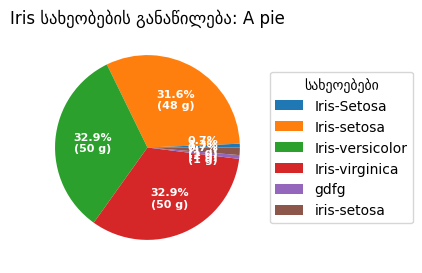

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# დიაგრამაზე ნაჩვენებია რამდენი ჩანაწერია თითოეულ სახეობაზე
c.execute("SELECT Species, COUNT(*) FROM Iris GROUP BY Species")
data = c.fetchall()

species = [row[0] for row in data]

counts = [row[1] for row in data]


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(counts, autopct=lambda pct: func(pct, counts),
                                  textprops=dict(color="w"))

ax.legend(wedges, species,
          title="სახეოებები",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Iris სახეობების განაწილება: A pie")

plt.show()


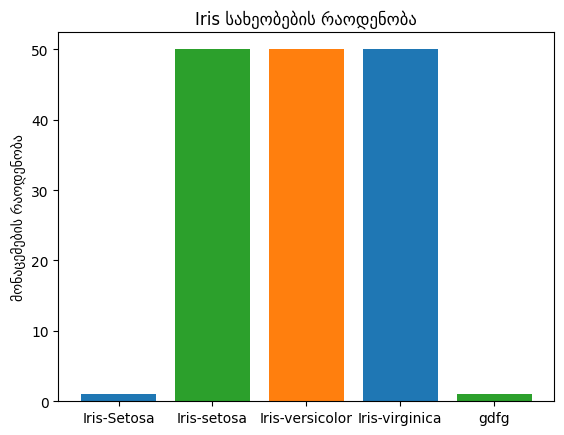

In [8]:
# დიაგრამით ვიგებ რამდენი ყვავილია species_ში
import sqlite3
import matplotlib.pyplot as plt


conn = sqlite3.connect('nine.sqlite3')
c = conn.cursor()


c.execute("SELECT Species, COUNT(*) FROM Iris GROUP BY Species")
data = c.fetchall()
conn.close()


species = [row[0] for row in data]
counts = [row[1] for row in data]
colors = ['tab:blue', 'tab:green', 'tab:orange']

fig, ax = plt.subplots()

ax.bar(species, counts, color=colors)

ax.set_ylabel('მონაცემების რაოდენობა')
ax.set_title('Iris სახეობების რაოდენობა')

plt.show()




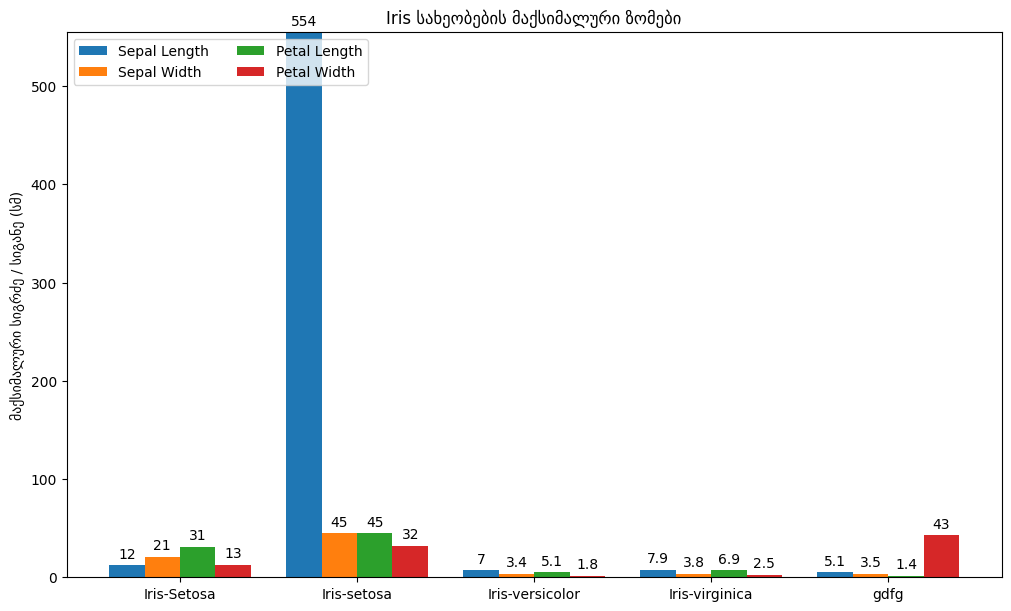

In [13]:
# აჩვენებს სახეობების ზომებს
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('nine.sqlite3') 
conn.row_factory = sqlite3.Row
c = conn.cursor()



c.execute("""
    SELECT Species, 
           MAX(SepalLengthCm), 
           MAX(SepalWidthCm), 
           MAX(PetalLengthCm), 
           MAX(PetalWidthCm)
    FROM Iris
    GROUP BY Species
""")
data = c.fetchall()


species = [row[0] for row in data]

iris_max = {
    'Sepal Length': [row[1] for row in data],
    'Sepal Width':  [row[2] for row in data],
    'Petal Length': [row[3] for row in data],
    'Petal Width':  [row[4] for row in data],
}

x = np.arange(len(species))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

for attribute, measurement in iris_max.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('მაქსიმალური სიგრძე / სიგანე (სმ)')
ax.set_title('Iris სახეობების მაქსიმალური ზომები')
ax.set_xticks(x + width * 1.5, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, max(max(v) for v in iris_max.values()) + 1)

plt.show()




In [14]:
conn.commit()
conn.close()

